# Introduction

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. the IPython magics are just helper functions which set up the environment so that the web based rendering can be enabled.  

`%matplotlib notebook` provides an interactive environment.

`%matplotlib inline` - Matplotlib is configured to render into the browser.

In [1]:
%matplotlib notebook

## 1. Layers in matplotlib
`matplotlib` has two layers. A backend layer, which knows about low level graphics routines it can render to the screen or to a file. We'll use the inline backend for most of our work. And the artist layer, which describes primitives, collections, and containers. It knows how figures are composed of subfigures and where objects are in a given axes coordinate system.

### 1.1 Backends
A _backend_ is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. There's a number of different interactive backends, but there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs. 

In [2]:
# import matplotlib
import matplotlib as mpl
# get nbAgg backend
mpl.get_backend() 

'nbAgg'

### 1.2 Artist Layer
The _artist layer_ is an abstraction around drawing and layout primitives. The root of visuals is a set of containers which includes a figure object with one or more subplots, each with a series of one or more axes. 

The artist layer also contains primitives and collections. These are base drawing items, things like a rectangle, ellipse or a line. And collections of items, such as a path, which might capture many lines together into a polygon shape. Collections are easy to recognize as their name tends to end in the word collection.  

![Artist Layer](https://matplotlib.org/_images/inheritance-f965f673138e3d2c62a727b9afd9500b385009eb.png)

### 1.3 Scripting Layer

This layer helps simplify and speed up our interaction with the environment in order to build plots quickly. The scripting layer used here is `pyplot`

## 2. Procedural & Descriptive Libraries
The `pyplot` scripting layer is a **procedural method** for building a visualization, in that we tell the underlying software which drawing actions we want it to take in order to render our data. 

There are also **declarative methods** for visualizing data. HTML is a great example of this. Instead of issuing command after command to the backend rendering agent, which is the browser with HTML, HTML documents are formatted as models of relationships in a document, often called the DOM, or Document Object Model. 

These are two fundamentally different ways of creating and representing graphical interfaces. 

# Basic Plotting in matplotlib

Let's import the `pyplot` scripting layer as `plt`. All of the functions which we'll run against the `pyplot` module are part of the scripting layer of the architecture.

In [3]:
import matplotlib.pyplot as plt
plt.plot?

In [4]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

<IPython.core.display.Javascript object>

Here we see that the first object is a Line2D object. The third argument in the  plot function should be a string, which signifies how we want that data point to be rendered. 

In [5]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.' 
plt.plot(3, 2, '.')

We see that a dot appears in the plot above. 

Let's see how to make a plot without using the scripting layer. It is a bit more verbose. This is often refered as matplotlib object API. But it can be thought of as directly interfacing with the artist layer instead. 

In [6]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
# Importing figure object
from matplotlib.figure import Figure

# create a new figure 
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
# the return value of the subplot is the axes object
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# Now, the backend that we're using, the one for the jupiter notebooks, isn't able to render this directly. 
# Since it expects the scripting layer pyplot to have created all of the objects. 

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [7]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


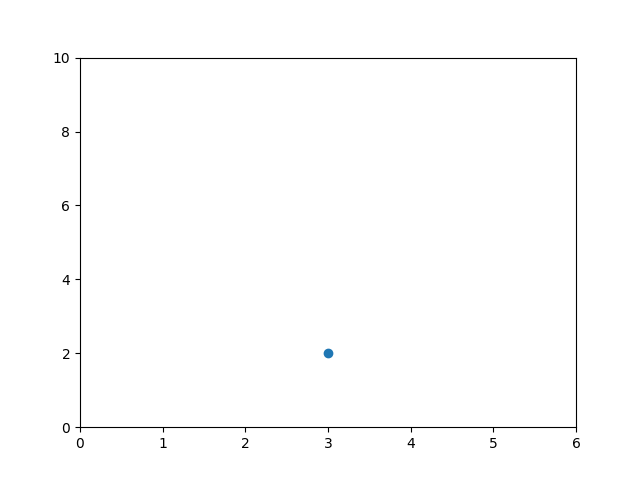

[0, 6, 0, 10]

In [8]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])
#Since we're doing this with the scripting layer once we run the jupiter cell it render to the nbAgg back end 

<IPython.core.display.Javascript object>


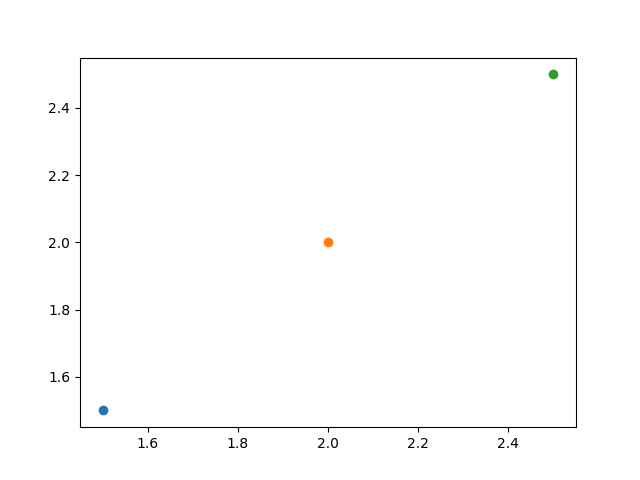

In [9]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

We see that the points are colored as the axis recognizes them as different data series. 

In [10]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

Here we can see that there's actually three line 2D objects contained in this axis. These are our data points. The number of spines, which are actual renderings of the borders of the frame, including tic markers, two axis objects, and a bunch of text, which are the labels for the chart. There's even a rectangle, which is the background for the axis. 

There are two basic things to keep in mind.
1. `pyplot` is going to retrieve the current figure with the function gcf and then get the current axis with the function gca
2. `pyplot` just mirrors the API of the axis objects. So you can call the `plot` function against the `pyplot` module. But this is calling the axis plot functions underneath, so be aware. 
3. Finally, the function declaration from most of the functions in `matplotlib` end with an open set of keyword arguments


# Scatterplots

<IPython.core.display.Javascript object>


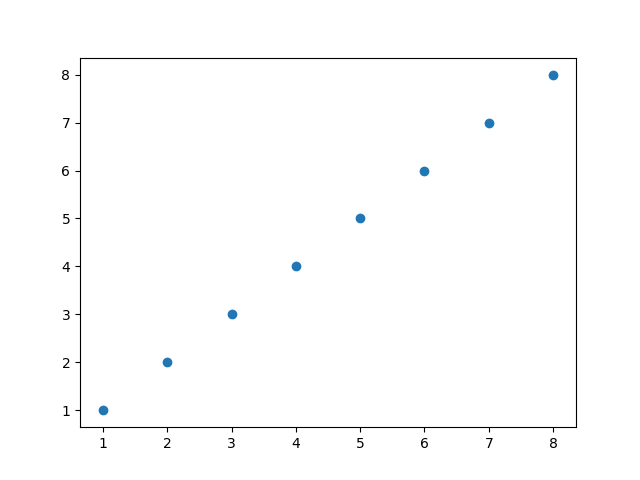

In [11]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


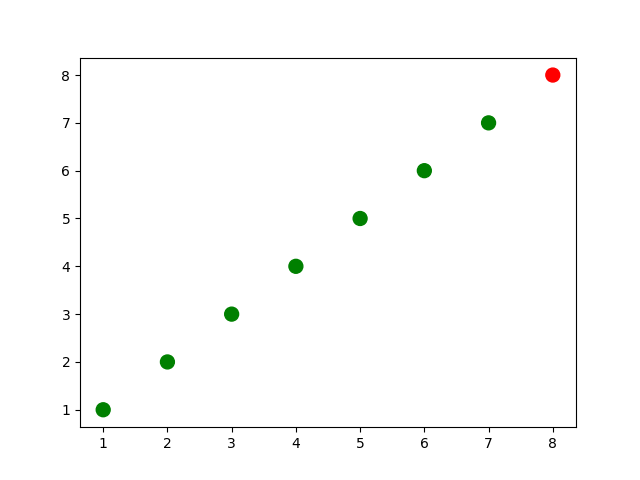

In [12]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

### Recalling zip methods

zip method takes a number of iterables and creates tuples out of them, matching elements based on index. 

In [13]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [14]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


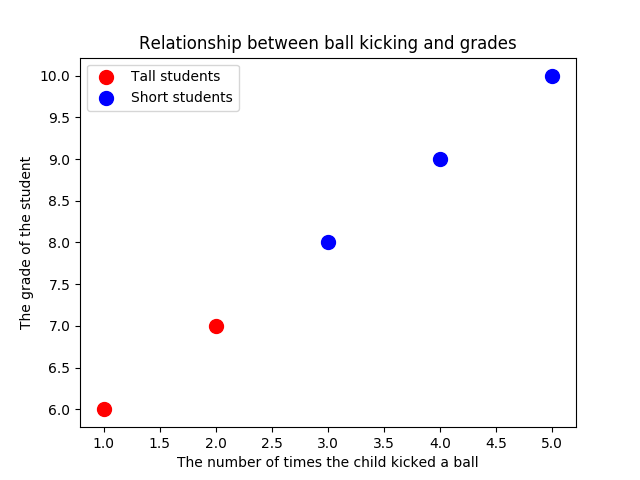

In [15]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [16]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

In [17]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [18]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [19]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [20]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [21]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [22]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

<IPython.core.display.Javascript object>


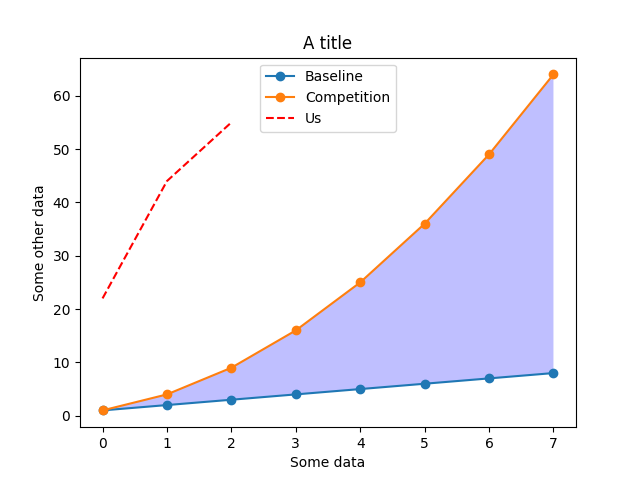

In [23]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

It is worth noting that 
1. we only gave `y axis` values and the function was smart enough to understand to use index as the x-axis.
2. the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. 

In [24]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [25]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

### Fill between method

This is a great way to show, for instance, the standard deviation of results or error bars. 

In [26]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

### Working with dates!

<IPython.core.display.Javascript object>


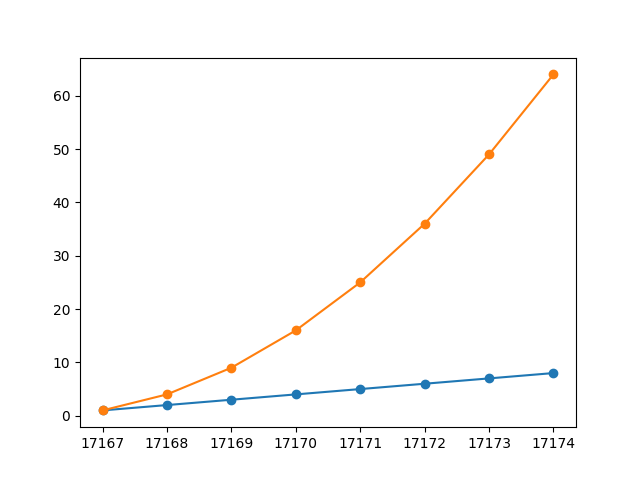

In [27]:
# create a new image
plt.figure()

# start-date, end-data and date type
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

This is unfortunately one of the great pain points in data science in Python, date time handling. The standard library does it in two different ways, while NumPy, which is used for scientific computing, does it a third way. In fact, there's probably a dozen replacement libraries for date times in Python. 

Let's try using pandas which contains `to_datetime`. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting. 

<IPython.core.display.Javascript object>


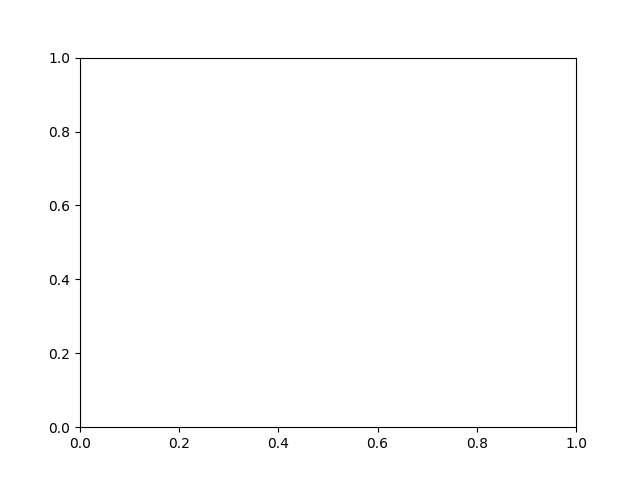

TypeError: object of type 'map' has no len()

In [28]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

That resulted in error. The problem is the map function returns an iterator. Matplotlib can't handle the iterator, so we need to convert it to a list first. 

In [ ]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [ ]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [ ]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [ ]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [ ]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

# Bar Charts

In [ ]:
plt.figure()
xvals = range(len(linear_data)) 
plt.bar(xvals, linear_data, width = 0.3)

In [ ]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

So the plot looks okay, but not great. All of the x labels are to the far left of the items being described, and not centered. Now, we can center them with a given bar, using the align parameter, but it's a bit frustrating when you have to make multiple bars, and you have to calculate it yourself. And it's a pain to go through and add a new data series manually. And this gets worse, we actually have to manually iterate through and add in dates if we want them. Because otherwise we couldn't set the bar left location appropriately. 

There are some other nice features of bar charts, though. For instance, you can add error bars to each bar as well, using the y-error parameter. 

### Error Bars

In [ ]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

### Stacked Bar Chart

In [ ]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

### Horizontal Bar Charts

In [ ]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

# Dejunkifying the plot

<IPython.core.display.Javascript object>


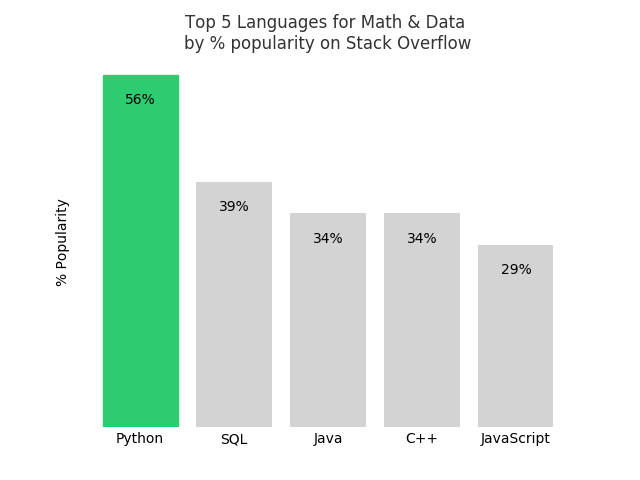

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

bars = plt.bar(pos, popularity, align='center', color = ['lightgray'])
bars[0].set_color('#2ecc71')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# Removing ticks by setting the length = 0
plt.tick_params(axis=u'both', which=u'both',length=0)

# Removing y-axis labels
plt.gca().axes.yaxis.set_ticklabels([])

# Removing the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Direct Labelling
for bar in bars:
    h = bar.get_height()
    plt.gca().text(x = bar.get_x() + bar.get_width()/2, y = h-4, s = str(int(h))+'%', ha = 'center', va = 'center')

plt.show()

## Dejunkifying - Prof's Solution

<IPython.core.display.Javascript object>


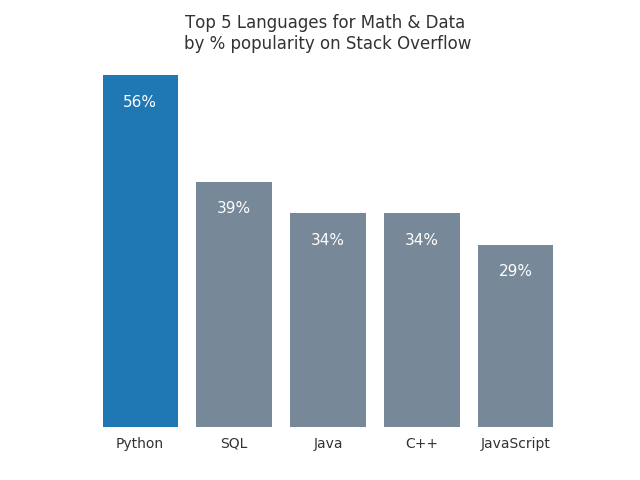

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()